In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

Questão 2: Análise mono-variada de todos os preditores

In [2]:
wp = pd.read_csv('dataset\water_potability.csv')
wp.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [3]:
#forma do dataset com todas as linhas
wp.shape

(3276, 10)

In [4]:
#forma do dataset sem as linhas com dados faltando
mxmh_new = wp.dropna()
mxmh_new.shape

(2011, 10)

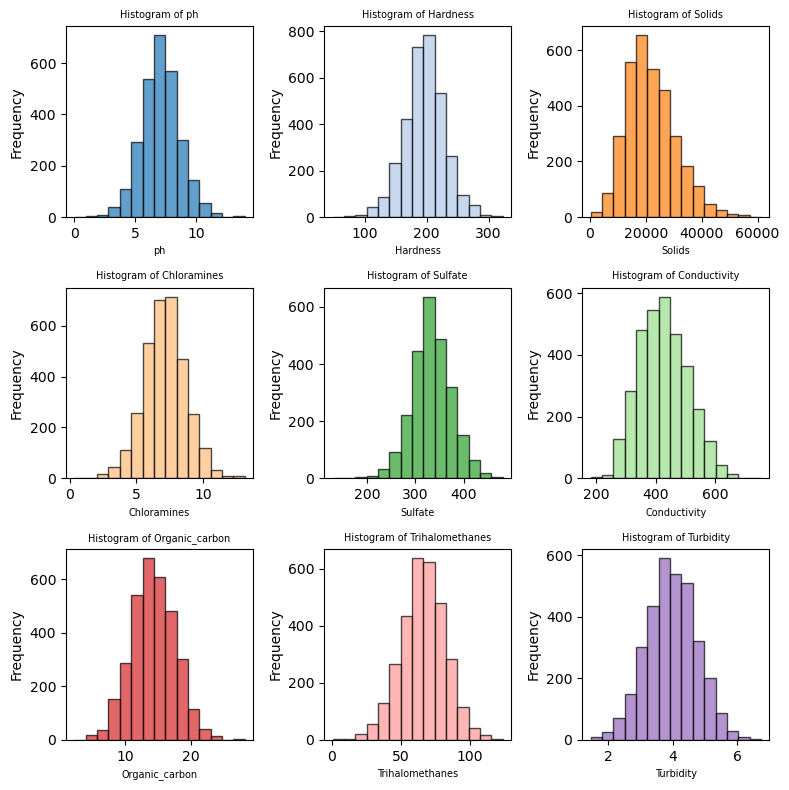

In [5]:
# configura o plot dos histogramas
num_histograms = 9
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes_flat = axes.flatten()
colors = plt.cm.tab20.colors[:num_histograms]

# percorre a matriz de variáveis numéricas e plota histogramas de diferentes cores
for i, (column, ax) in enumerate(zip(wp.columns, axes_flat)):
    wp[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)
    
# apaga os subplots vazios
if i <= num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])

# ajusta o layout
plt.tight_layout()
plt.show()


In [14]:
# Calcular as médias de cada variavél preditora

print(np.mean(wp['ph']))
print(np.mean(wp['Hardness']))
print(np.mean(wp['Solids']))
print(np.mean(wp['Chloramines']))
print(np.mean(wp['Sulfate']))
print(np.mean(wp['Conductivity']))
print(np.mean(wp['Organic_carbon']))
print(np.mean(wp['Trihalomethanes']))
print(np.mean(wp['Turbidity']))

7.080794504276835
196.36949601730151
22014.092526077104
7.122276793425786
333.7757766108135
426.20511068255325
14.284970247677318
66.39629294676803
3.966786169791058


In [15]:
# Calcular o Desvio Padrão de cada variavél preditora

print(np.std(wp['ph']))
print(np.std(wp['Hardness']))
print(np.std(wp['Solids']))
print(np.std(wp['Chloramines']))
print(np.std(wp['Sulfate']))
print(np.std(wp['Conductivity']))
print(np.std(wp['Organic_carbon']))
print(np.std(wp['Trihalomethanes']))
print(np.std(wp['Turbidity']))

1.594033259703235
32.87474281466435
8767.232421179984
1.5828432520255513
41.408539661817464
80.81172732448098
3.3076570518600743
16.17241107038782
0.7802632934105386


In [27]:
# Calcula skewness

print(scipy.stats.skew(wp['ph'], axis=0))
print(scipy.stats.skew(wp['Hardness'], axis=0))
print(scipy.stats.skew(wp['Solids'], axis=0))
print(scipy.stats.skew(wp['Chloramines'], axis=0))
print(scipy.stats.skew(wp['Sulfate'], axis=0))
print(scipy.stats.skew(wp['Conductivity'], axis=0))
print(scipy.stats.skew(wp['Organic_carbon'], axis=0))
print(scipy.stats.skew(wp['Trihalomethanes'], axis=0))
print(scipy.stats.skew(wp['Turbidity'], axis=0))

nan
-0.0393236888840398
0.6213498181329244
-0.012092899840854208
nan
0.2643691049378588
0.025520889860291555
nan
-0.007813062873377002


### 3) class-conditional mono-variate analysis

#### a) Agua não potável

In [32]:
non_potable = wp[wp['Potability'] == 0]
non_potable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


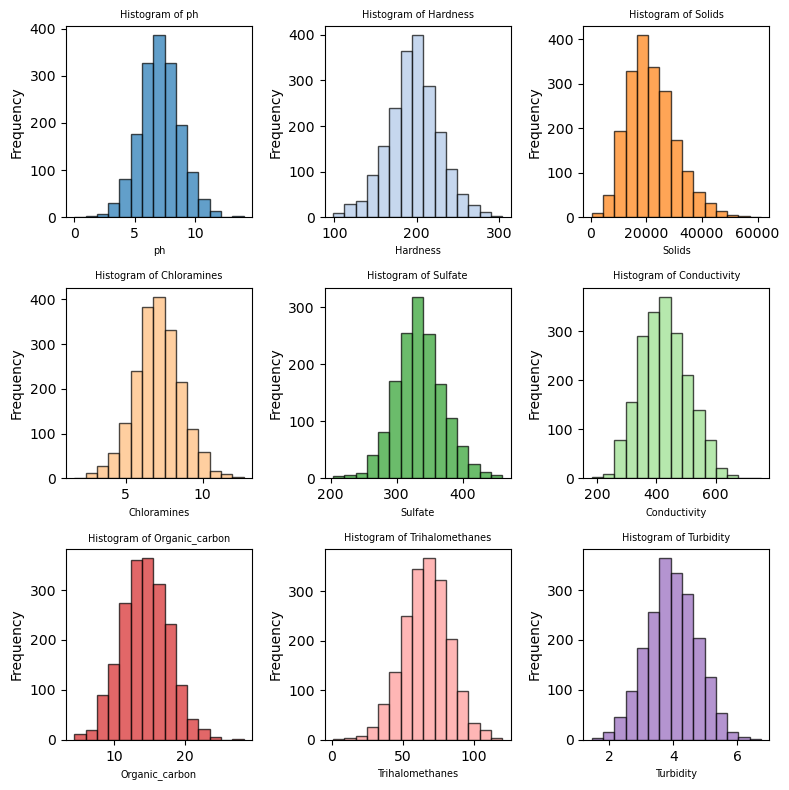

In [33]:
# configura o plot dos histogramas
num_histograms = 9
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes_flat = axes.flatten()
colors = plt.cm.tab20.colors[:num_histograms]

# percorre a matriz de variáveis numéricas e plota histogramas de diferentes cores
for i, (column, ax) in enumerate(zip(non_potable.columns, axes_flat)):
    non_potable[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)
    
# apaga os subplots vazios
if i <= num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])

# ajusta o layout
plt.tight_layout()
plt.show()


In [35]:
# Calcular as médias de cada variavél preditora

print(np.mean(non_potable['ph']))
print(np.mean(non_potable['Hardness']))
print(np.mean(non_potable['Solids']))
print(np.mean(non_potable['Chloramines']))
print(np.mean(non_potable['Sulfate']))
print(np.mean(non_potable['Conductivity']))
print(np.mean(non_potable['Organic_carbon']))
print(np.mean(non_potable['Trihalomethanes']))
print(np.mean(non_potable['Turbidity']))

7.085378435983544
196.73329218472793
21777.490788123265
7.092174563443736
334.5642895786881
426.7304535650347
14.364335279947
66.30355527306088
3.965799769125516


In [36]:
# Calcular o Desvio Padrão de cada variavél preditora

print(np.std(non_potable['ph']))
print(np.std(non_potable['Hardness']))
print(np.std(non_potable['Solids']))
print(np.std(non_potable['Chloramines']))
print(np.std(non_potable['Sulfate']))
print(np.std(non_potable['Conductivity']))
print(np.std(non_potable['Organic_carbon']))
print(np.std(non_potable['Trihalomethanes']))
print(np.std(non_potable['Turbidity']))

1.6829990816022253
31.04976656918904
8540.930615296524
1.5006692576132474
36.73337998437344
80.02728223966835
3.3337189727681182
16.075067973497173
0.7800870720300275


In [37]:
# Calcula skewness

print(scipy.stats.skew(non_potable['ph'], axis=0))
print(scipy.stats.skew(non_potable['Hardness'], axis=0))
print(scipy.stats.skew(non_potable['Solids'], axis=0))
print(scipy.stats.skew(non_potable['Chloramines'], axis=0))
print(scipy.stats.skew(non_potable['Sulfate'], axis=0))
print(scipy.stats.skew(non_potable['Conductivity'], axis=0))
print(scipy.stats.skew(non_potable['Organic_carbon'], axis=0))
print(scipy.stats.skew(non_potable['Trihalomethanes'], axis=0))
print(scipy.stats.skew(non_potable['Turbidity'], axis=0))

nan
-0.021475072267720014
0.6057294465222888
-0.022273790965312696
nan
0.2582372291799676
0.06888923904136904
nan
-0.009191307211914556


#### b) Água potável

In [38]:
potable = wp[wp['Potability'] == 1]
potable.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1


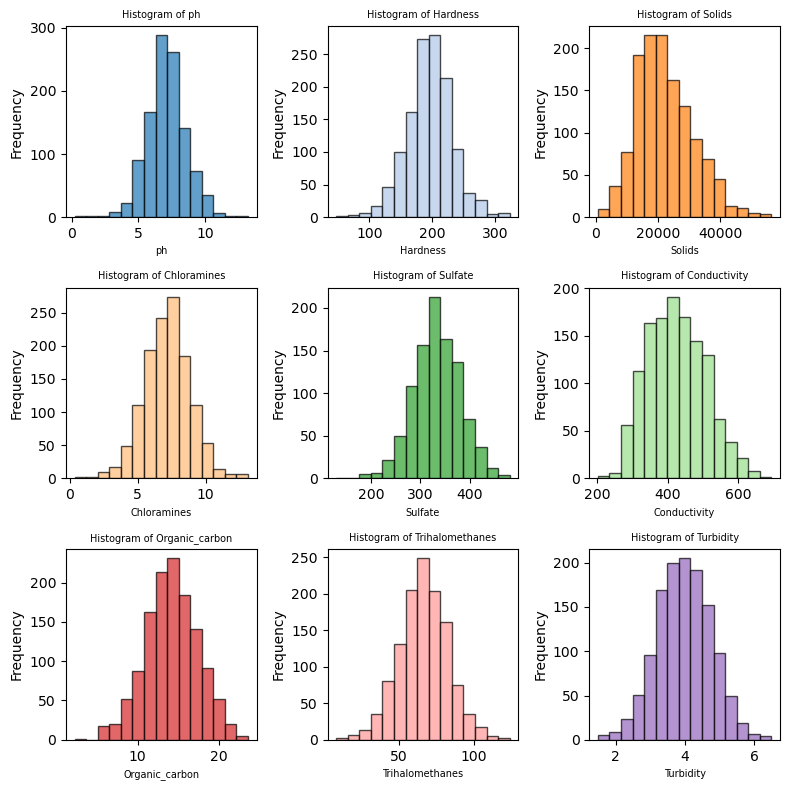

In [39]:
# configura o plot dos histogramas
num_histograms = 9
fig, axes = plt.subplots(3, 3, figsize=(8,8))
axes_flat = axes.flatten()
colors = plt.cm.tab20.colors[:num_histograms]

# percorre a matriz de variáveis numéricas e plota histogramas de diferentes cores
for i, (column, ax) in enumerate(zip(potable.columns, axes_flat)):
    potable[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}', fontsize = 7)
    ax.set_xlabel(column, fontsize = 7)
    
# apaga os subplots vazios
if i <= num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])

# ajusta o layout
plt.tight_layout()
plt.show()


In [ ]:
# Calcular as médias de cada variavél preditora

print(np.mean(potable['ph']))
print(np.mean(potable['Hardness']))
print(np.mean(npotable['Solids']))
print(np.mean(non_potable['Chloramines']))
print(np.mean(non_potable['Sulfate']))
print(np.mean(non_potable['Conductivity']))
print(np.mean(non_potable['Organic_carbon']))
print(np.mean(non_potable['Trihalomethanes']))
print(np.mean(non_potable['Turbidity']))